# Case 2 - 5. trial
## Diabetic retinopathy analysis
Jenni Hautojärvi   
Last edited: 25.2.2017   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Sciences  


# 1. Objectives
In this assignment the main goal was to get familiar how to use convolutional neural networks to classify medical. In this case diabetic retinopathy images.

# 2. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers, models
%matplotlib inline

Using TensorFlow backend.


# 3. Building network

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 4. Data preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure, color

train_dir = '/Users/hautsi/Documents/Cognitive Systems for Health Technology Applications /retinopathy-dataset-master/dataset2/train'
validation_dir = '/Users/hautsi/Documents/Cognitive Systems for Health Technology Applications /retinopathy-dataset-master/dataset2/validation'
test_dir = '/Users/hautsi/Documents/Cognitive Systems for Health Technology Applications /retinopathy-dataset-master/dataset2/test'

# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(
      rescale=1./255,
      zoom_range=0.5,
      #horizontal_flip=True,
      fill_mode='nearest')


# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [5]:
# Testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
labels_batch

array([ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.], dtype=float32)

# 5. Train the Model

In [7]:
#steps_per_epoch should be (number of training images total/batch_size)
#validation_steps should be (number of validation images total/batch_size)

import time

t1 = time.time()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=62,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=21,
      verbose=1)

t2 = time.time()


Epoch 1/30
62/62 [==============================] - 696s 11s/step - loss: 0.5577 - acc: 0.7099 - val_loss: 0.5570 - val_acc: 0.7119
Epoch 2/30
62/62 [==============================] - 512s 8s/step - loss: 0.5336 - acc: 0.7211 - val_loss: 0.5472 - val_acc: 0.7361
Epoch 3/30
62/62 [==============================] - 546s 9s/step - loss: 0.5290 - acc: 0.7235 - val_loss: 0.5511 - val_acc: 0.7458
Epoch 4/30
62/62 [==============================] - 552s 9s/step - loss: 0.5271 - acc: 0.7357 - val_loss: 0.5408 - val_acc: 0.7385
Epoch 5/30
62/62 [==============================] - 521s 8s/step - loss: 0.5263 - acc: 0.7447 - val_loss: 0.5501 - val_acc: 0.7264
Epoch 6/30
62/62 [==============================] - 521s 8s/step - loss: 0.5127 - acc: 0.7485 - val_loss: 0.5520 - val_acc: 0.7385
Epoch 7/30
62/62 [==============================] - 518s 8s/step - loss: 0.5180 - acc: 0.7518 - val_loss: 0.5606 - val_acc: 0.7240
Epoch 8/30
62/62 [==============================] - 514s 8s/step - loss: 0.5165 - 

In [8]:
print('Elapsed time {:.2f} hours.'.format((t2-t1)/3600))
print('Time per epoch {:.2f} minutes.'.format((t2-t1)/50/60))

Elapsed time 4.29 hours.
Time per epoch 5.14 minutes.


In [9]:
# Save the model
model.save('case_2_run_5.h5')

# 6. Results

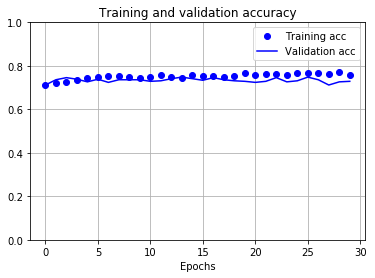

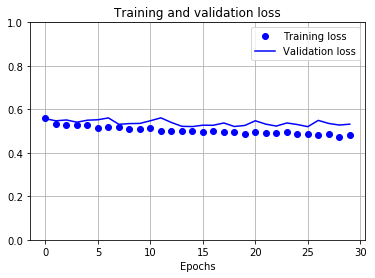

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim([0, 1])
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0, 1])
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

# 7. Conclusions

In previous model versions, I found that the drop in use did not achieve accuracy above 0.8. I also used more augmentation in training pictures but it did not improve the accuracy at all. I also tried to use 

- exposure.equalize_adapthist 
- exposure.rescale_intensity 
- exposure.equalize_hist
- util.invert
   
but since we are using rescale = 1./255 the images got very dark. I also tried different batch_size (like 25,40,30,..) but 20 was best using this model.